In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly

In [2]:
df = pd.read_csv('Alpha_Motors.csv')

In [3]:
df.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [4]:
# Check data types incase there is need for conversion.
print(df.dtypes)

Unnamed: 0               int64
Make                    object
Year of manufacture    float64
Condition               object
Mileage                float64
Engine Size            float64
Fuel                    object
Transmission            object
Price                   object
Build                   object
dtype: object


In [5]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Convertion
df['Price'] = df['Price'].replace('[\$,₦]', '', regex=True).astype(float)

In [9]:
# Fill missing values with median because we need the numbers
df['Year of manufacture'].fillna(df['Year of manufacture'].median(), inplace=True)
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine Size'].fillna(df['Engine Size'].median(), inplace=True)


In [10]:
# Convert columns to integers after filling 
df['Year of manufacture'] = df['Year of manufacture'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)
df['Engine Size'] = df['Engine Size'].astype(int)

In [11]:
# Fill missing values in categorical columns with the most frequent value in oder to avoid distorting the dataset
categorical_cols = ['Make', 'Condition', 'Fuel', 'Transmission', 'Build']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

df.to_csv('cleaned_dataset.csv', index=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  4095 non-null   int32  
 2   Condition            4095 non-null   object 
 3   Mileage              4095 non-null   int32  
 4   Engine Size          4095 non-null   int32  
 5   Fuel                 4095 non-null   object 
 6   Transmission         4095 non-null   object 
 7   Price                4095 non-null   float64
 8   Build                4095 non-null   object 
dtypes: float64(1), int32(3), object(5)
memory usage: 240.1+ KB


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,toyota,2007,nigerian used,166418,2400,petrol,automatic,3120000.0,suv
1,lexus,2008,nigerian used,138024,2500,petrol,automatic,5834000.0,suv
2,mercedes-benz,2008,nigerian used,376807,3000,petrol,automatic,3640000.0,suv
3,lexus,2008,nigerian used,213362,2500,petrol,automatic,3594000.0,suv
4,mercedes-benz,2008,nigerian used,106199,2500,petrol,automatic,8410000.0,suv


In [12]:
# Fix typos just incase
df['Make'] = df['Make'].replace({'tooyota': 'toyota'})

df.to_csv('cleaned_dataset.csv', index=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  4095 non-null   int32  
 2   Condition            4095 non-null   object 
 3   Mileage              4095 non-null   int32  
 4   Engine Size          4095 non-null   int32  
 5   Fuel                 4095 non-null   object 
 6   Transmission         4095 non-null   object 
 7   Price                4095 non-null   float64
 8   Build                4095 non-null   object 
dtypes: float64(1), int32(3), object(5)
memory usage: 240.1+ KB


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,toyota,2007,nigerian used,166418,2400,petrol,automatic,3120000.0,suv
1,lexus,2008,nigerian used,138024,2500,petrol,automatic,5834000.0,suv
2,mercedes-benz,2008,nigerian used,376807,3000,petrol,automatic,3640000.0,suv
3,lexus,2008,nigerian used,213362,2500,petrol,automatic,3594000.0,suv
4,mercedes-benz,2008,nigerian used,106199,2500,petrol,automatic,8410000.0,suv


In [13]:
df.describe()

,Year of manufacture,Mileage,Engine Size,Price
count,4095.000000,4.095000e+03,4095.000000,4.095000e+03
mean,2007.910379,1.821664e+05,3178.270085,4.271288e+06
std,4.041435,2.091046e+05,7201.910280,4.900064e+06
min,1992.000000,1.000000e+00,3.000000,4.580000e+05
25%,2005.000000,1.025985e+05,2400.000000,1.872000e+06
50%,2008.000000,1.613520e+05,2500.000000,2.940000e+06
75%,2010.000000,2.306370e+05,3500.000000,4.725000e+06
max,2021.000000,9.976050e+06,371000.000000,5.880000e+07


In [14]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 879


In [15]:
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3216 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 3216 non-null   object 
 1   Year of manufacture  3216 non-null   int32  
 2   Condition            3216 non-null   object 
 3   Mileage              3216 non-null   int32  
 4   Engine Size          3216 non-null   int32  
 5   Fuel                 3216 non-null   object 
 6   Transmission         3216 non-null   object 
 7   Price                3216 non-null   float64
 8   Build                3216 non-null   object 
dtypes: float64(1), int32(3), object(5)
memory usage: 213.6+ KB


In [17]:
for col in ['Make', 'Condition', 'Fuel', 'Transmission', 'Build']:
    print(f"Unique values in {col}:\n", df[col].value_counts(), "\n")

Unique values in Make:
 Make
toyota           1151
lexus             371
mercedes-benz     346
honda             320
ford              152
hyundai           142
nissan            141
kia                73
land rover         58
volkswagen         51
bmw                50
mazda              50
acura              43
chevrolet          33
infiniti           33
peugeot            30
mitsubishi         19
pontiac            17
volvo              16
suzuki             13
dodge              12
audi               11
jaguar             10
opel                9
jeep                9
porsche             7
chrysler            6
renault             6
fiat                5
gmc                 4
lincoln             4
skoda               3
changan             3
jac                 2
mini                2
bentley             1
citroen             1
rover               1
seat                1
ssangyong           1
mg                  1
hummer              1
isuzu               1
cadillac            1
bui

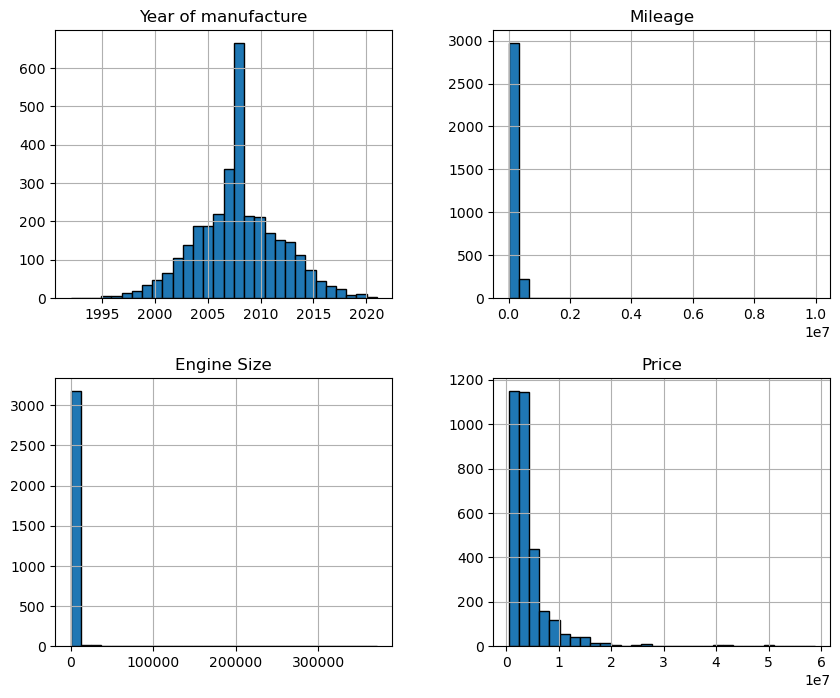

In [18]:
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.show()

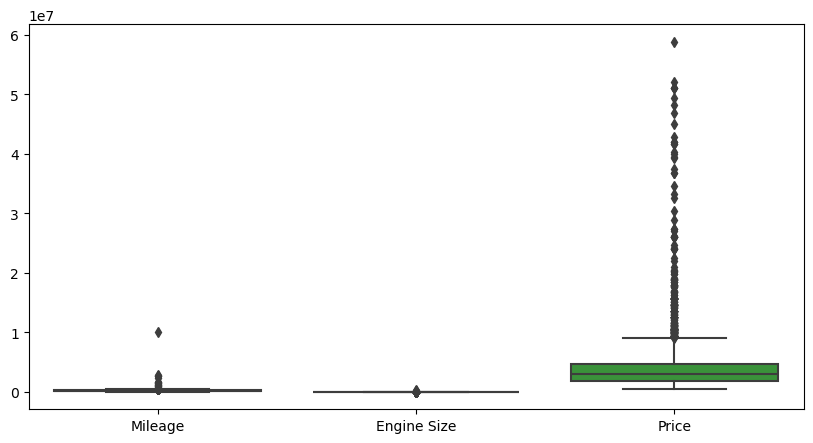

In [19]:
# Boxplot to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Mileage', 'Engine Size', 'Price']])
plt.show()

In [20]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'automatic'

<Figure size 800x600 with 0 Axes>

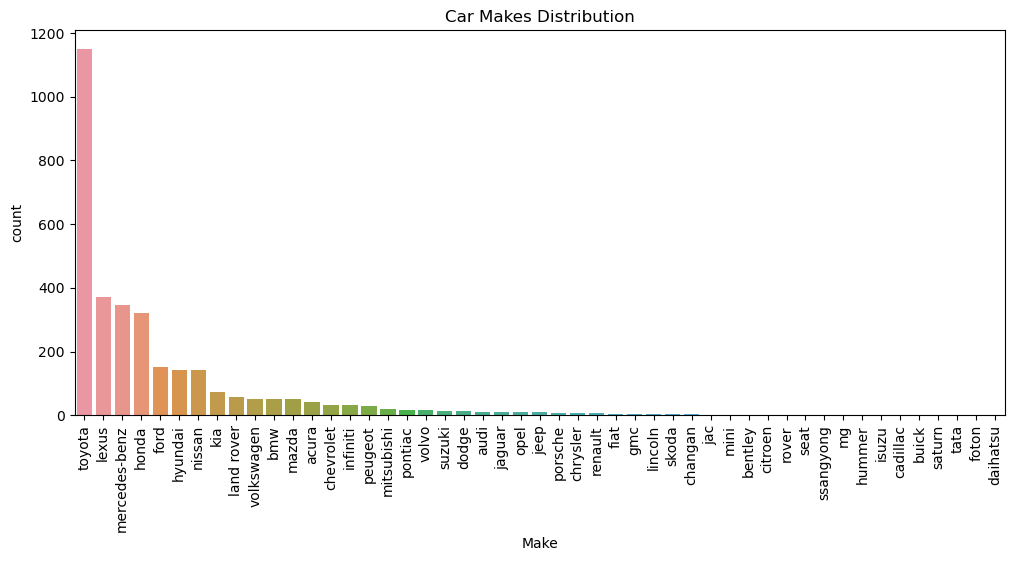

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Make'], order=df['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Car Makes Distribution")
plt.show()

In [22]:
# Dropping the column cause of data inconsistency and unrelibility 
df.drop(columns=['Build'], inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)

In [23]:
avg_price = df.groupby(['Make', 'Year of manufacture'])['Price'].mean().reset_index()

avg_price = avg_price.sort_values(by=['Make', 'Year of manufacture'])
print(avg_price)

      Make  Year of manufacture         Price
0    acura                 2001  1.687500e+06
1    acura                 2002  1.361250e+06
2    acura                 2003  7.350000e+05
3    acura                 2004  1.981200e+06
4    acura                 2005  1.656000e+06
..     ...                  ...           ...
390  volvo                 2004  2.257500e+06
391  volvo                 2005  1.463333e+06
392  volvo                 2006  2.625000e+06
393  volvo                 2007  2.835000e+06
394  volvo                 2008  3.150143e+06

[395 rows x 3 columns]


In [24]:
top_5_cars = df.groupby('Make')['Price'].mean().reset_index()
top_5_cars = top_5_cars.sort_values(by='Price', ascending=False).head(5)

print("Top 5 Car Makes by Average Selling Price:")
print(top_5_cars)

Top 5 Car Makes by Average Selling Price:
          Make         Price
45        tata  1.785000e+07
2      bentley  1.689500e+07
6      changan  1.292500e+07
39       rover  1.018500e+07
25  land rover  9.551121e+06


In [25]:
# Do automatic cars have high price value than manual cars
transmission_price = df.groupby('Transmission')['Price'].mean().reset_index()

print("Average Price of Automatic vs Manual Cars:")
print(transmission_price)

Average Price of Automatic vs Manual Cars:
  Transmission         Price
0          amt  3.113250e+06
1    automatic  4.386215e+06
2          cvt  4.586842e+06
3       manual  2.489056e+06


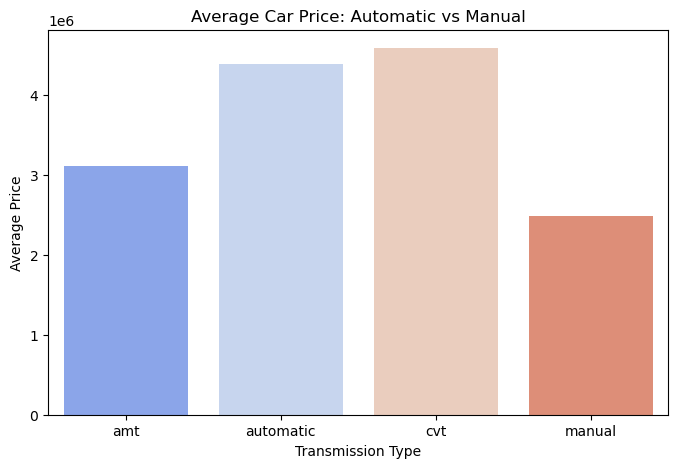

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x=transmission_price['Transmission'], y=transmission_price['Price'], palette="coolwarm")
plt.title("Average Car Price: Automatic vs Manual")
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.show()

In [27]:
# is ther a  correlation between Mileage and Price
correlation = df[['Mileage', 'Price']].corr()

print("Correlation between Mileage and Price:")
print(correlation)


Correlation between Mileage and Price:
          Mileage     Price
Mileage  1.000000 -0.148775
Price   -0.148775  1.000000


In [28]:
# depreciation rate
brand_depreciation = df.groupby(['Make', 'Year of manufacture'])['Price'].mean().reset_index()

brand_depreciation = brand_depreciation.sort_values(by=['Make', 'Year of manufacture'])
print(brand_depreciation)


      Make  Year of manufacture         Price
0    acura                 2001  1.687500e+06
1    acura                 2002  1.361250e+06
2    acura                 2003  7.350000e+05
3    acura                 2004  1.981200e+06
4    acura                 2005  1.656000e+06
..     ...                  ...           ...
390  volvo                 2004  2.257500e+06
391  volvo                 2005  1.463333e+06
392  volvo                 2006  2.625000e+06
393  volvo                 2007  2.835000e+06
394  volvo                 2008  3.150143e+06

[395 rows x 3 columns]


In [29]:
brand_depreciation['Depreciation'] = brand_depreciation.groupby('Make')['Price'].pct_change() * 100
print(brand_depreciation)


      Make  Year of manufacture         Price  Depreciation
0    acura                 2001  1.687500e+06           NaN
1    acura                 2002  1.361250e+06    -19.333333
2    acura                 2003  7.350000e+05    -46.005510
3    acura                 2004  1.981200e+06    169.551020
4    acura                 2005  1.656000e+06    -16.414294
..     ...                  ...           ...           ...
390  volvo                 2004  2.257500e+06      7.500000
391  volvo                 2005  1.463333e+06    -35.179033
392  volvo                 2006  2.625000e+06     79.384966
393  volvo                 2007  2.835000e+06      8.000000
394  volvo                 2008  3.150143e+06     11.116150

[395 rows x 4 columns]


C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


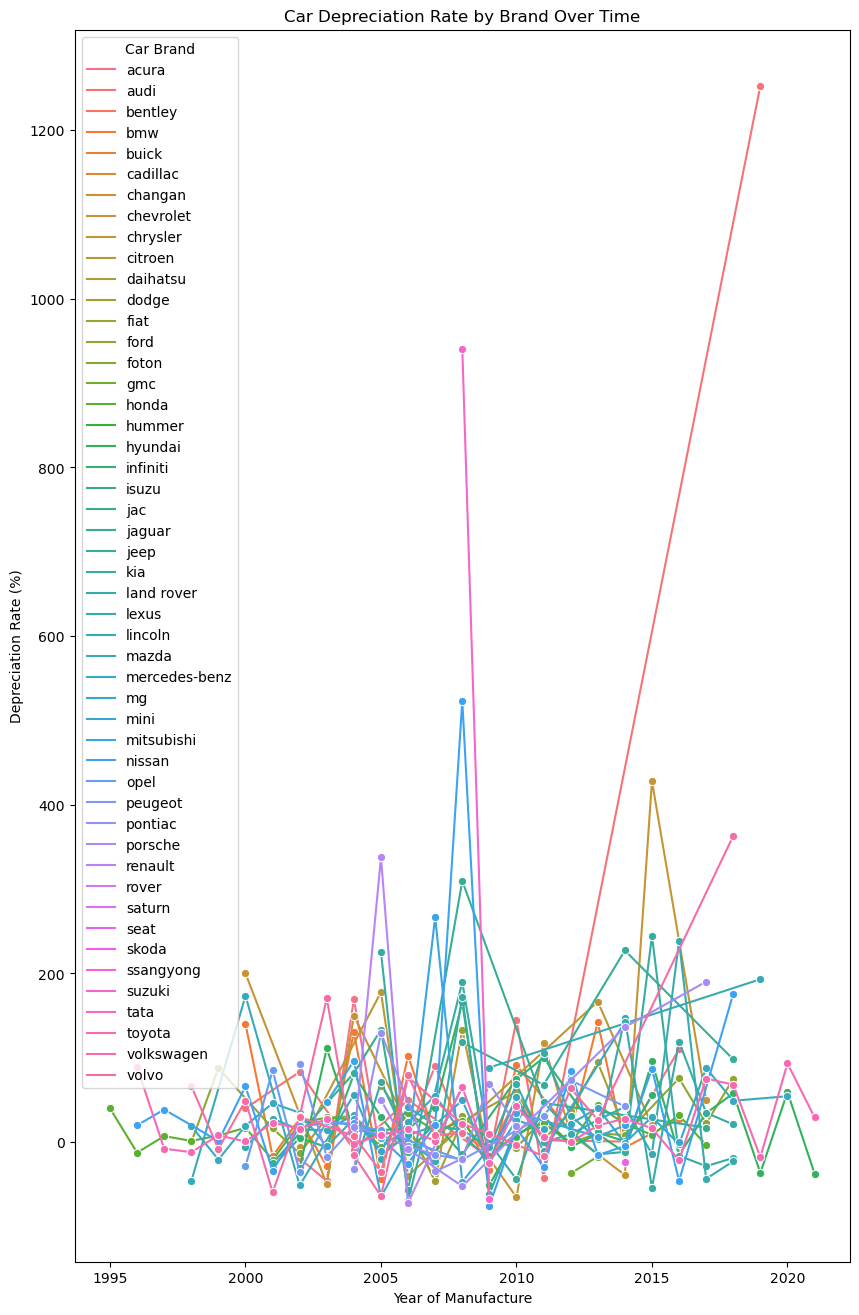

In [33]:
plt.figure(figsize=(10, 16))

# Plot depreciation trends for different brands
sns.lineplot(data=brand_depreciation, x='Year of manufacture', y='Depreciation', hue='Make', marker="o")

plt.title("Car Depreciation Rate by Brand Over Time")
plt.xlabel("Year of Manufacture")
plt.ylabel("Depreciation Rate (%)")
plt.legend(title="Car Brand")
plt.show()

In [34]:
# how does condition affect price
condition_price = df.groupby('Condition')['Price'].mean().reset_index()

print("Average Price Based on Condition:")
print(condition_price)


Average Price Based on Condition:
       Condition         Price
0      brand new  2.456800e+07
1   foreign used  6.011426e+06
2  nigerian used  3.603251e+06


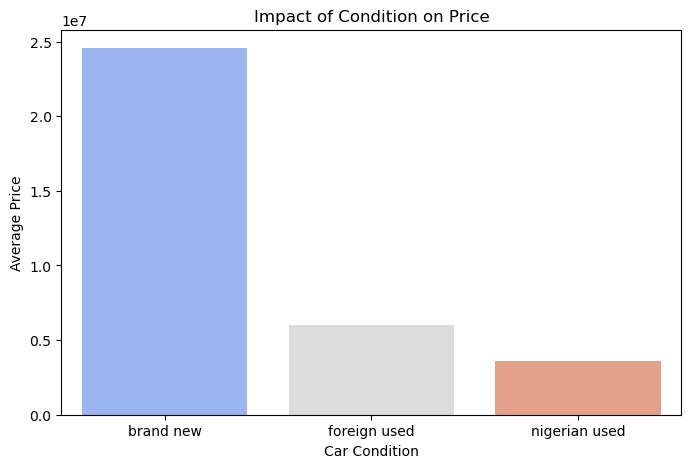

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=condition_price['Condition'], y=condition_price['Price'], palette="coolwarm")
plt.title("Impact of Condition on Price")
plt.xlabel("Car Condition")
plt.ylabel("Average Price")
plt.show()

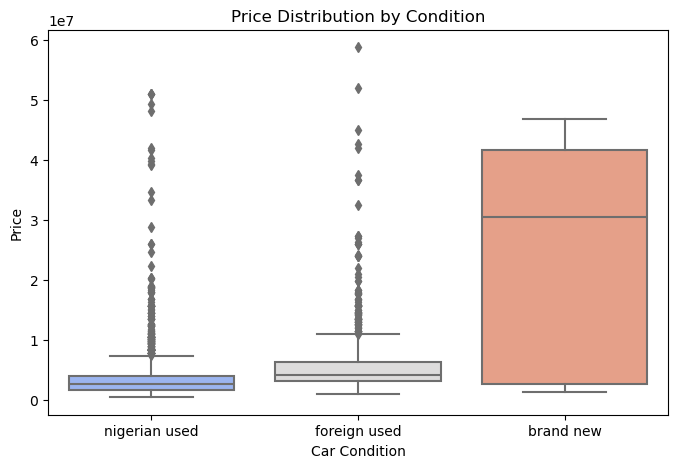

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Condition'], y=df['Price'], palette="coolwarm")
plt.title("Price Distribution by Condition")
plt.xlabel("Car Condition")
plt.ylabel("Price")
plt.show()
